# Zadanie

Proszę napisać modyfikację algorytmu k-means (wersja Lloyd) - CEC zgodnie z algorytmem http://ww2.ii.uj.edu.pl/~spurek/zad/lloyd.pdf. 
Nie można używać żadnych funkcji z k-means w pythonie. 

  * wszysko piszemy ręcznie
  * uzupełnij implementację poniższej klasy

In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

class cec(object):
    """
    """

    def __init__(self):
        self.labels = None
        self.clusters = None
        self.n_clusters = None
        self.cluster_centers = None

    def fit(self, X, n_clusters, epsilon):
        self.n_clusters = n_clusters
        self.labels = [i for i in range(n_clusters)]
        self.cluster_centers = X[np.random.permutation(X.shape[0])[:self.n_clusters]]
        p = []
        E = []
        h = np.inf
        n = X.__len__()
        newH = np.inf
        covMatrix = np.cov(np.array(np.transpose(np.array(X))))
        for i in range(n_clusters):
            p.append(1/n_clusters)
            E.append(covMatrix)
        while True:
            h = newH
            self.cluster_points(p, E, X)
            self.cluster_centers = []
            for i in range(n_clusters):
                M = self.clusters[i]
                self.cluster_centers.append(np.mean(M, axis=0))
                E[i] = np.cov(np.array(np.transpose(np.array(M))))
                p[i] = self.clusters[i].__len__() / n
            newH = self.calculateH(p, E)
            if newH >= h - epsilon:
                break

    def calculateH(self, p, E):
        N = self.cluster_centers[0].__len__()
        result = 0
        for i in range(self.n_clusters):
            result += p[i] * (-math.log(p[i], math.e)) + (math.log(np.linalg.det(E[i]), math.e) + N * math.log(2 * math.pi * math.e, math.e)) /2
        return result

    def cluster_points(self, p, E, X):
        self.clusters = {}
        for x in X:
            self.cluster_point(p, E, x)

    def cluster_point(self, p, E, x):
        min = self.calculateMin(p[0], E[0], x, self.cluster_centers[0])
        k = 0
        for i in range(self.n_clusters):
            tmp = self.calculateMin(p[i], E[i], x, self.cluster_centers[i])
            if tmp < min:
                min = tmp
                k = i
        try:
            self.clusters[k].append(x)
        except KeyError:
            self.clusters[k] = [x]

    def calculateMin(self, p, E, x, m):
        return -math.log(p, math.e) - math.log(self.function(m, E, x), math.e)

    def function(self, m, E, x):
        z = x-m
        M = np.linalg.matrix_power(E, -1)
        return math.exp(-np.matmul(np.matmul(np.transpose(z),M),z)/2) / (2 * math.pi)**(self.cluster_centers[0].__len__())*np.sqrt(np.linalg.det(E))

    def predict_point(self, x):
        return min([(i[0], np.linalg.norm(x-self.cluster_centers[i[0]])) for i in enumerate(self.cluster_centers)], key=lambda t:t[1])[0]

# Zadanie

Sprawdż działanie napisanego algorytmu na poniższych danych.

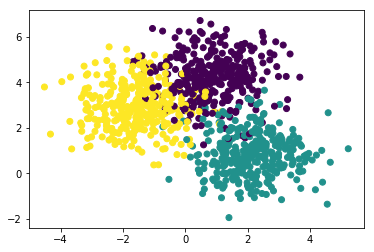

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
n_classes = len(set(y_blobs))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.show()

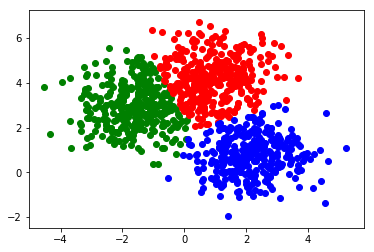

In [72]:
def plot_kmeans(k_means, colors=['red','blue','green']):
    for k,v in k_means.clusters.items():
        data = np.array(v)
        plt.scatter(data[:, 0], data[:, 1], c=colors[k])

km = cec()
km.fit(X_blobs, 3, 0.01)
plot_kmeans(km)
plt.show()

# Zadanie

Wykonaj algorytm cec (własny) na zbiorze
  * iris (dwie wybrane współrzędne). 
  * http://ww2.ii.uj.edu.pl/~spurek/zad/EllipseGauss.txt
  * http://ww2.ii.uj.edu.pl/~spurek/zad/EllipseGauss2.txt

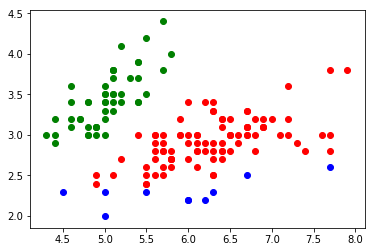

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()
k_iris = cec()
k_iris.fit(iris.data[:,0:2], 3, 0.01)
plot_kmeans(k_iris)
plt.show()

# Zadanie 
Predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym punkty i wykonaj dla nich predykcję.


Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. Narysuj wszystko na jednym wykresie.

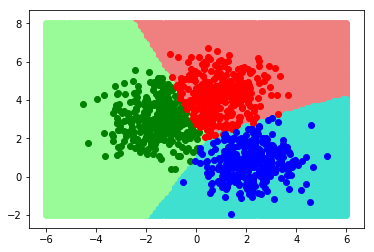

In [73]:
data = np.column_stack((np.random.uniform(-4, 4, 1000), np.random.uniform(-2, 6, 1000)))
colors = ['red','blue','green']
mesh_colors = ['lightcoral','turquoise', 'palegreen']
plot = [[],[],[]]
for x in np.linspace(-6,6,100):
    for y in np.linspace(-2,8, 100):
        class_ = km.predict_point((x,y))
        plot[class_].append([x,y])

for i,d in enumerate(plot):
    d = np.array(d)
    plt.scatter(d[:, 0], d[:, 1], c=mesh_colors[i])
    
for k,v in km.clusters.items():
    data = np.array(v)
    plt.scatter(data[:, 0], data[:, 1], c=colors[k])

plt.show()